# Ya hemos escogido el modelo que mejor representa nuestro problema

En este Notebook mostramos simplemente los pasos previos y el entrenamiento y métricas de ese modelo:

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# All rows and columns display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Train processed dataset
df_train = pd.read_csv('./data/train_processed.csv')

In [3]:
df_train.head().T

,0,1,2,3,4
amt,4.390000,14.960000,32.430000,66.360000,1.153500e+02
gender,0.000000,0.000000,1.000000,0.000000,0.000000e+00
lat,41.606000,48.340000,39.779500,33.746700,3.381550e+01
long,-109.230000,-122.345600,-93.301400,-117.172100,-1.121202e+02
city_pop,27971.000000,85.000000,964.000000,54287.000000,1.312922e+06
merch_lat,41.971530,49.088724,39.155293,33.720708,3.454270e+01
merch_long,-109.512691,-123.344203,-92.421151,-116.381735,-1.112824e+02
is_fraud,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Year,2019.000000,2020.000000,2019.000000,2020.000000,2.019000e+03
Month,2.000000,3.000000,7.000000,6.000000,5.000000e+00


Ya vimos que se trata de un problema **muy desbalanceado** en cuanto a la variable `is_fraud`. Vamos a hacer uso de la librería `imbalanced-learn` para mejorar el aprendizaje de los modelos que probemos:

https://imbalanced-learn.org/stable/

## Como ya dijimos, aplicaremos la estrategia de *undersampling* con *Random Under Sampler* para equilibrar las clases de fraude / no fraude:

In [4]:
!pip install imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

In [5]:
# Convert to values format for RandomUnderSampler ("rus")
X = df_train.drop(['is_fraud'], axis = 1)
y = df_train['is_fraud']

resampler = RandomUnderSampler(sampling_strategy='auto', random_state=17)
X_resampled, y_resampled = resampler.fit_resample(X, y)

# Build a **new DF with this undersampling**
df_train_rus = pd.DataFrame(X_resampled, columns=X.columns)
df_train_rus['is_fraud'] = y_resampled

Ahora tenemos que volver a separar la variable objetivo, `is_fraud`, de las demás del dataset `df_train_rus`:

In [6]:
X_train = df_train_rus.drop(['is_fraud'], axis = 1)
y_train = df_train_rus['is_fraud']

En este punto, es importante **normalizar** las variables numéricas (no es necesario en aquellas que aplicamos Encoders o en las que son binarias):

In [7]:
# Split X_train into normalizing variables and not-normalizing

variables_tonorm = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'Year', 'Month', 'Unemployed percent', 'close_s&p_500','change_usd_eur','crime_rate', 'age', 'week_number','day_of_week','day', 'hour', 'merch_home_distance']
X_train_tonorm = X_train[variables_tonorm]
X_train_notnorm = X_train.drop(variables_tonorm, axis = 1)

# Normalize
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler().fit(X_train_tonorm)
X_train_normalized = scaler_X.transform(X_train_tonorm)

# Join all variables together:

X_train_notnorm = X_train_notnorm.values
X_train = np.concatenate([X_train_normalized, X_train_notnorm], axis = 1)

Cargamos el dataset de Test procesado:

In [8]:
# Train processed dataset
df_test = pd.read_csv('./data/test_processed.csv')

In [9]:
# Same steps, USING **TRAIN SCALER**

X_test = df_test.drop(['is_fraud'], axis = 1)
y_test = df_test['is_fraud']

X_test_tonorm = X_test[variables_tonorm]
X_test_notnorm = X_test.drop(variables_tonorm, axis = 1)

X_test_normalized = scaler_X.transform(X_test_tonorm)

X_test_notnorm = X_test_notnorm.values
X_test = np.concatenate([X_test_normalized, X_test_notnorm], axis = 1)

## Modelo escogido:

Importamos librerías y herramientas muy útiles:

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,roc_auc_score, roc_curve, f1_score
from sklearn.metrics import classification_report

Definimos una función que nos ayude a representar nuestras métricas:

In [11]:
LABELS= ['Not_fraud','Fraud']
def results(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, cmap="crest", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

### Y el modelo:

In [12]:
maxDepthOptimo = 14
minSamplesLeafOptimo = 4
minSamplesSplitOptimo = 2

treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo, min_samples_leaf=minSamplesLeafOptimo, min_samples_split= minSamplesSplitOptimo,
                                   class_weight='balanced').fit(X_train,y_train)

y_pred = treeModel.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) # Compute the F1 score ("balanced F-score") Very interesting in imbalanced datasets

cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
TN = cm[0, 0]


print("Accuracy del modelo DecisionTree escogido:", accuracy)
print("Precisión del modelo DecisionTree escogido:", precision)
print("Recall del modelo DecisionTree escogido:", recall)
print("F1-Score del modelo DecisionTree escogido:", f1)
print("-----")
print("Verdaderos Positivos DecisionTree:", TP)
print("Falsos Negativos DecisionTree:", FN)
print("Falsos Positivos DecisionTree:", FP)
print("Verdaderos Negativos DecisionTree:", TN)

Accuracy del modelo DecisionTree escogido: 0.9734856766510382
Precisión del modelo DecisionTree escogido: 0.15952031748770598
Recall del modelo DecisionTree escogido: 0.9580310880829016
F1-Score del modelo DecisionTree escogido: 0.27350048073367356
-----
Verdaderos Positivos DecisionTree: 1849
Falsos Negativos DecisionTree: 81
Falsos Positivos DecisionTree: 9742
Verdaderos Negativos DecisionTree: 358807


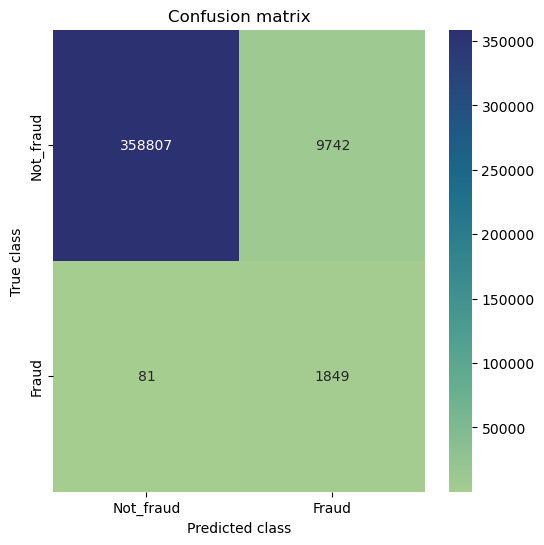

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    368549
           1       0.16      0.96      0.27      1930

    accuracy                           0.97    370479
   macro avg       0.58      0.97      0.63    370479
weighted avg       1.00      0.97      0.98    370479



In [14]:
results(y_test, y_pred)

### Features del modelo Decision Tree Classifier:

Primero tenemos que hacer una pequeña adaptación para pintar este gráfico:

In [15]:
column_to_move = df_train.pop("is_fraud")
df_train.insert(0, 'is_fraud', column_to_move)

feature_names_dt = df_train.columns[1:]

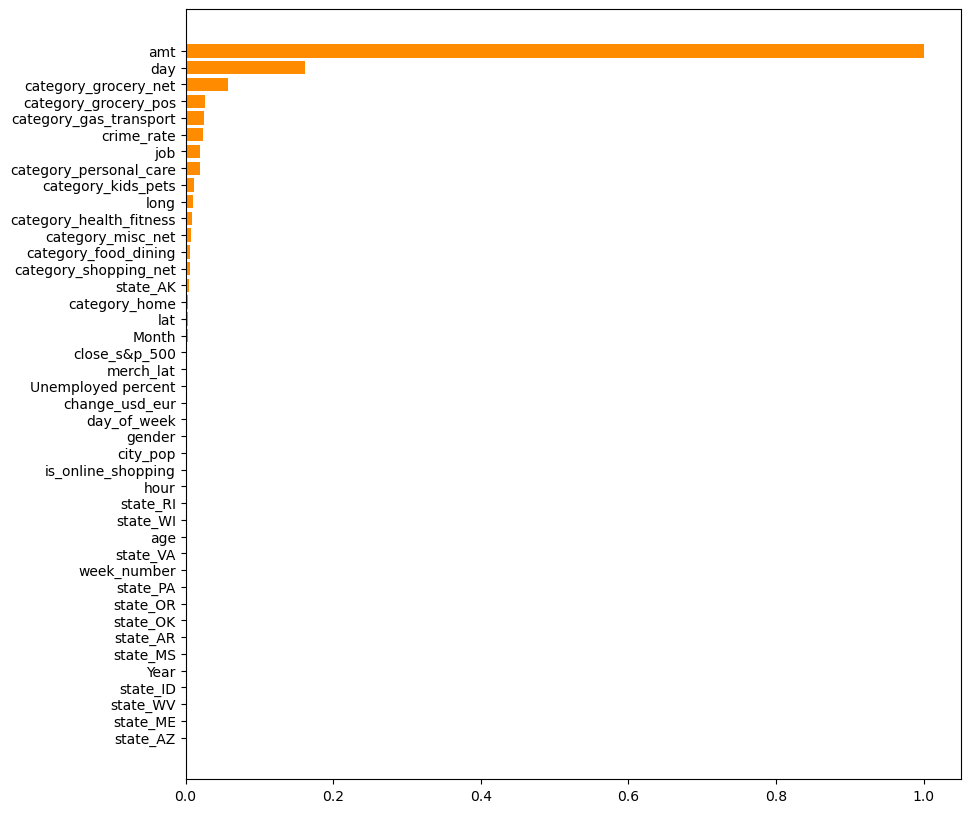

In [16]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::1]

# We have seen many zero values, there is no interest in showing these, we filter them:
non_zero_importances = importances[indices][importances[indices] > 0.00]
non_zero_indices = indices[importances[indices] > 0.00]

plt.figure(figsize=(10, 10))
plt.barh(range(len(non_zero_indices)), non_zero_importances, color = 'darkorange')
plt.yticks(range(len(non_zero_indices)), feature_names_dt[non_zero_indices])
plt.show()


Vemos que la cantididad de la transacción es muy importante en el modelo de predicción, pero también el día en el que se realice. Interesante que el modelo da relevancia a si la compra es en un establecimiento de comida (online o presencial), y lo mismo en gasolineras.